## OTP Bogota Setup
A step-by-step guide - Brian Hill - May 2020 


One you install the appropriate packages, this notebook should be all that is required to automate the steps of setting up Open Trip Planner, running scripts on it, and conducting analyses.  This notebook may originally be in any location on your computer, it will move itself later. 


### Notebook Setup:

In the command line prompts I have not found a way to use varialbes from jupyter notebook environment.  And we would like to replace my user directory /Users/BrianHill with the equivalent location on your comptuer.  So, select the whole notebook, find all instances of /Users/BrianHill and replace with /Users/YourName (e.g. /Users/LoganRitter), by pressing esc, command-A, and then the f key. (Not command-f, just the f key which opens the in-notebook find and replace option.)

If you do this properly, the next cell should not error (and not do anything).

In [1]:
%%bash
cd /Users/BrianHill

### Requirements:

TODO Look into requirements.txt, easy way to install all of these dependencies.  Also virtual environment

In [15]:
# Import all used packages and confirm present
import pandas as pd 
import numpy as np
import osmnx as ox
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

Note that it is not advised to install packages using Jupyter notebook, since it may not install in the appropriate environment.  This issue is well documented here: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

As such, it is neccesary to install the following on your computer before running this notebook:
- OSMnx
- Jython 
- Wget 
- Pandas 
- Java

#### OSMnx

Using pip, can install by running: pip install osmnx 

Can also install using conda.

#### Jython 

If you do not have it already, it is neccesary to download the Java JDK to aid in installation from this link:
https://www.oracle.com/java/technologies/javase-jdk14-downloads.html

You may be required to navigate to system prefrences, security and privacy, and under general click "allow Java SDK" or something similar to confirm that you want to open the application downloaded from the internet. 

Then you will need to get the most recent jython edition from this url and follow all default installation instructions.  Click "install Jython" on this web page: 

https://www.jython.org/download.html

Click through all of the installation guide settings, and keep all of the default options selected.

Check that in /Users/BrianHill there is a folder named Jython 2.7.2

#### wget

wget helps with downloading files from the internet, put in a link to download from and it will download that file into the present working directory.

First, try downloading it using:
pip install wget


If that doesn't work, you can try downloading it with brew.

If you don't have it already, download it by using Brew. If you don't yet have brew, first install brew by running:

ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

Then, once you have brew, in terminal run: 

brew install wget

Source: https://stackoverflow.com/questions/33886917/how-to-install-wget-in-macos


### File Structure

To make the folder system, we use a few bash commands to make the requisit folders to capture Open Trip Planner's expected file systems. After completing these steps it should look something the picture on the otp website under Routers: http://docs.opentripplanner.org/en/latest/Configuration/

If you already have an otp folder this will rename it 'otp_previous'.  

If you do not have an open trip planner folder, then this will error, and that is expected behavior. 

In [3]:
%%bash
cd /Users/BrianHill
mv otp otp_previous

mv: rename otp to otp_previous: No such file or directory


CalledProcessError: Command 'b'cd /Users/BrianHill\nmv otp otp_previous\n'' returned non-zero exit status 1.

Then we make the requisite folder structure.

In [4]:
%%bash 
cd /Users/BrianHill
mkdir otp
cd otp
mkdir graphs
mkdir cache 
cd graphs 
mkdir bogota_no_gondola

However, when we print the files in the current directory we see that this notebook is in some other location (perhaps downloads) and not the otp folder we just made.  This is to show that the notebook is not in the open trip planner folder. 

In [3]:
!ls

$RECYCLE.BIN
2002.MP4
Bogota_OTP_Setup.ipynb
E3EEC402-C9FC-477A-9B77-094B42CAB4C8.JPG
IMG_0641.JPG
IMG_1123.JPG
IMG_1155.JPG
IMG_1332.JPG
IMG_1360.JPG
IMG_1432.JPG
IMG_1689.JPG
IMG_2624.JPG
IMG_2831.JPG
IMG_2975.JPG
IMG_3292.JPG
IMG_3932.JPG
IMG_4070.JPG
IMG_4265.JPG
IMG_4415.JPG
IMG_4566.JPG
IMG_4648.JPG
IMG_4834.JPG
IMG_4931.JPG
IMG_5114.MOV
IMG_5115.MOV
IMG_5116.MOV
IMG_5118.JPG
IMG_5126.MOV
IMG_5127.MOV
IMG_5132.MOV
IMG_5137.MOV
IMG_5140.MOV
IMG_5142.MOV
IMG_5143.PNG
IMG_5145.MOV
IMG_5148.MOV
IMG_5149.MOV
IMG_5151.MOV
IMG_5152.MOV
IMG_5153.MOV
IMG_5156.MOV
IMG_5159.MOV
IMG_5165.MOV
IMG_5166.MOV
IMG_5168.MOV
IMG_5169.MOV
IMG_5170.MOV
IMG_5194.JPG
IMG_5196.JPG
IMG_5197.MOV
IMG_5198.MOV
IMG_5199.MOV
IMG_5200.MOV
IMG_5202.MOV
IMG_5204.MOV
IMG_5216.MOV
IMG_5219.MOV
IMG_5227.MOV
IMG_5229.MOV
IMG_5231.MOV
IMG_5232.MOV
IMG_5233.MOV
IMG_5234.MOV
IMG_5235.MOV
IMG_5245.MOV
IMG_5246.MOV
IMG_5247.MOV
IMG_5251.MOV
IMG_5254.MOV
IMG_5256.MOV
IMG_5257.MOV
IMG_5262.MOV
IMG_5263.MOV
IMG_5266.MOV
IMG_

We then move this notebook inside the otp folder so it does not clutter our user folder.  This command will work, however it will cause any edits made after this point to fail, and so we must exit and load the jupyter notebook again.

(The page should reload.)

In [32]:
%%bash
mv Bogota_OTP_Setup.ipynb /Users/BrianHill/otp
cd /Users/BrianHill/otp
jupyter notebook Bogota_OTP_Setup.ipynb

### Restart Here!! Make sure to close previous notebook browser tab

If for some reason you can't tell them apart, hit refresh.  If the page sucessfully refreshes, then you are in the correct brower tab.

Here we can confirm that we are in the new directory.

In [1]:
!ls

Bogota_OTP_Setup.ipynb cache                  graphs


#### Side note:
In OTP they note that the /var directory is the default place to install otp.  This location is conveninet since it is at the first level of the comptuer and is found on almost all Linux and Unix operating systems.  It is, however, inconvenient since on macs it is by default hidden (unless command-shift-. are pressed all at once) and is filled with other (possibly critical?) folders.  

It is because of this reason that we have many long paths in our OTP commands.

### You probably do not want to re-run anything above here ever!

### GTFS Data

We will first move into the bogota_no_gondola folder, and place the data of the overall Bogota Area's Formal Transit system using transitfeeds.com inside of it.  We then rename the file from 'download' to bogota_transit_gtfs.zip.

TODO: Check with other GTFS website, are they the same?

(Will take ~ 1 min, printout will be red but that is OK)

In [2]:
%%bash
cd graphs
cd bogota_no_gondola
wget https://transitfeeds.com/p/simur-bogota/973/latest/download
mv download bogota_transit_gtfs.zip

--2020-06-01 17:33:22--  https://transitfeeds.com/p/simur-bogota/973/latest/download
Resolving transitfeeds.com (transitfeeds.com)... 173.230.157.38
Connecting to transitfeeds.com (transitfeeds.com)|173.230.157.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openmobilitydata-data.s3-us-west-1.amazonaws.com/public/feeds/simur-bogota/973/20190225/gtfs.zip [following]
--2020-06-01 17:33:23--  https://openmobilitydata-data.s3-us-west-1.amazonaws.com/public/feeds/simur-bogota/973/20190225/gtfs.zip
Resolving openmobilitydata-data.s3-us-west-1.amazonaws.com (openmobilitydata-data.s3-us-west-1.amazonaws.com)... 52.219.112.1
Connecting to openmobilitydata-data.s3-us-west-1.amazonaws.com (openmobilitydata-data.s3-us-west-1.amazonaws.com)|52.219.112.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38272257 (36M) [application/zip]
Saving to: ‘download’

     0K .......... .......... .......... .......... ..........  0% 1.25M 29s


### OSM Data 

We will download the osm data for Bogota, Columbia using the osmnx package, specificying bogota, plot it to visually confirm it is the area of interest, and then save it locally in the otp/bogota_no_gondola graphs package.

(Will take ~ 5 min)

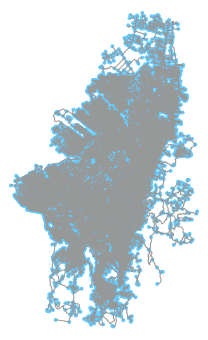

In [12]:
# We configure the all_oneway to be true, preserving the most raw format of OSM data enabling XML download.
ox.utils.config(all_oneway=True)
G = ox.graph_from_place('Bogota, Colombia', network_type='all')
fig, ax = ox.plot_graph(G)

We then download the data and save it to the bogota_no_gondola folder.  Note that we are saving in the XML format instead of the more compact pbf format, since OSMnx cannot save to .pbf.  In a simple graph building trial, they seemed to be read at similar speeds.  

(Will take ~30 min)

In [6]:
ox.save_load.save_as_osm(G, filename="osmnx_bogota.osm",folder='graphs/bogota_no_gondola')
! say open street maps writing done

### Open Trip Planner (OTP)

The only thing we really need here is the Open Trip Planner jar, which contains all of the required files and dependencies.  We are placing this jar just inside the otp folder we made earlier.

The Open Trip Planner Jar file contains all of the Open Trip Planner files in one compact location.  It is essentially the otp application, it contains information on how to build an otp graph, run an otp graph on server, calculate travel times between locations, and the like.  It is not neccesary to open the file, but we will always refrence it in the command line open trip planner commands.  

In [3]:
%%bash
wget https://repo1.maven.org/maven2/org/opentripplanner/otp/1.4.0/otp-1.4.0-shaded.jar

--2020-06-01 17:38:52--  https://repo1.maven.org/maven2/org/opentripplanner/otp/1.4.0/otp-1.4.0-shaded.jar
Resolving repo1.maven.org (repo1.maven.org)... 151.101.196.209
Connecting to repo1.maven.org (repo1.maven.org)|151.101.196.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61838786 (59M) [application/java-archive]
Saving to: ‘otp-1.4.0-shaded.jar’

     0K .......... .......... .......... .......... ..........  0%  664K 91s
    50K .......... .......... .......... .......... ..........  0% 1.40M 66s
   100K .......... .......... .......... .......... ..........  0% 1.39M 58s
   150K .......... .......... .......... .......... ..........  0% 3.72M 48s
   200K .......... .......... .......... .......... ..........  0% 2.47M 43s
   250K .......... .......... .......... .......... ..........  0% 2.27M 40s
   300K .......... .......... .......... .......... ..........  0% 2.62M 37s
   350K .......... .......... .......... .......... ..........  0% 2.84M 35s

The format of a java command to execute a jar file is:
    
 java [options] -jar [jarfile] [args...] 

We may run --help to see all of the different arguments we can give to the otp java file. 

We only use a few for our purposes, such as build, server, etc. 

In [4]:
%%bash
cd /Users/BrianHill/otp
java -jar otp-1.4.0-shaded.jar --help

OpenTripPlanner 1.4.0 b272f14007c97d769216e9ebab65baad7410cdf5
Usage: java -Xmx[several]G -jar otp.jar [options] Files for graph build.
  Options:
        --analyst
       Enable OTP Analyst extensions.
       Default: false
        --autoReload
       Auto-reload registered graphs when source data is modified.
       Default: false
        --autoScan
       Auto-scan for graphs to register in graph directory.
       Default: false
        --basePath
       Set the path under which graphs, caches, etc. are stored by default.
       Default: /var/otp
        --bindAddress
       Specify which network interface to bind to by address. 0.0.0.0 means all
       interfaces.
       Default: 0.0.0.0
        --build
       Build graphs at specified paths.
        --cache
       The directory under which to cache OSM and NED tiles. Default is
       BASE_PATH/cache.
        --clientFiles
       Path to directory containing local client files to serve.
        --disableFileCache
       Disable ht

### Graph building 
To build any graph for a particular city, we need to provide: 
    
otp jar: otp-1.4.0-shaded.jar
    
Path to folder with gtfs, osm, config files: /Users/BrianHill/otp/graphs/bogota_no_gondola
    
Specify amount of memory to dedicate: 10G  (can also do 2G)

Note that if run in terminal instead of through a jupyter notebook, there would be a live stream of output showing progress and steps.  It could be interesting to copy and paste (omitting the %%bash) into terminal to see this gradual building instead of just the output at the end.

TODO: Compare times to build in Jupyter note book vs. in Terminal

(will take ~6 min, do not be too concerned with any errors that pop up)

In [7]:
%%bash
cd /Users/BrianHill/otp
ls
java -Xmx10G -jar otp-1.4.0-shaded.jar --build /Users/BrianHill/otp/graphs/bogota_no_gondola 
say graph building done

Process is terminated.


#### Side note
If we do not want to save the graph, we can build and run the graph in one step by appending --inMemory.  If this is desired, change the format of the below textbox to code instead of markdown.



%%bash 
cd /Users/BrianHill/otp
ls
java -Xmx2G -jar otp-1.4.0-shaded.jar --build /Users/BrianHill/otp/graphs/bogota_no_gondola --inMemory

### Graph running  

To get the graph on a server we need to provide:

basePath: /Users/BrianHill/otp (top level directory with otp jar in it)

router: bogota_no_gondola (location of gtfs, osm, and any config files)

otp jar: otp-1.4.0-shaded.jar

Will take ~2 min to get setup, make sure when using the localhost to set the date before February 25, 2019 (as this is when the GTFS file ends.)

TODO: extend the GTFS file up to current time using editing library.

Then it will be live on the default server http://localhost:8080/ until kernel is interrupted.


In [ ]:
%%bash 
cd /Users/BrianHill/otp
ls
java -Xmx10G -jar otp-1.4.0-shaded.jar --basePath /Users/BrianHill/otp --router bogota_no_gondola --server


View in browser at:
    
http://localhost:8080/


### TODO Graph Visualizations using OTP quewrys, similar to UrbanAccess, e.g. look overall at network, look at bus line, Ciudad Bolivar

### Travel Time Script Creation 

Using some of Rafael Preria's work, we will use Jython to run a python script using OTP, written in Java.  The key inputs to the script are: 
- Origin points 
- Destination points

And in the script itself we specify:
- Location of graphs folder
- Router to use
- Date and time of trip
- Modes to use
- Additional configuration options (optional)

Note that in the below bash commands we are creating new files in the present working directory of Users/BrianHill/otp, the same folder as this notebook. 

#### Origin Points 

If this takes longer than 5 seconds, the graph is probably still running on the server from the "Graph Running" section.

In [2]:
%%bash
cat > points_origins.csv
GEOID,Y,X,Description
1,4.549647,-74.159542,Mirador-Paraiso station
2,4.550401,-74.150533,Manitas station
3,4.555669,-74.147564,Juan Pablo II station
4,4.569755,-74.139307,Portal Tunal

#### Destination Points

In [3]:
%%bash
cat > points_destinations.csv
GEOID,Y,X,Description
1,4.549647,-74.159542,Mirador-Paraiso station
2,4.550401,-74.150533,Manitas station
3,4.555669,-74.147564,Juan Pablo II station
4,4.569755,-74.139307,Portal Tunal
5,4.597581,-74.072726,Historic District
6,4.659224,-74.061834,Financial District
7,4.755922,-74.045701,Portal Norte
8,4.575976211,-74.12012724,Calle 40 sur station
9,4.571447,-74.128239,Hospital El Tunal
10,4.696172,-74.138572,Airport
11,4.693246,-74.056159,Calle 106 station
12,4.569166,-74.134377,Parque El Tunal
13,4.632203,-74.157224,Abastos
14,4.615257,-74.069262,Museo Nacional

#### Script Itself

Note that there are some customizable options when making the request object, they are outlined here:
http://dev.opentripplanner.org/javadoc/1.4.0/org/opentripplanner/api/common/RoutingResource.html


In [17]:
%%bash 
cat > travel_time_no_gondola_python_script.py

# SOURCE: RAFAEL PRERIA, python_script
from org.opentripplanner.scripting.api import OtpsEntryPoint

# Instantiate an OtpsEntryPoint
# NOTE WOULD NEED TO CHANGE THIS IN ORDER TO 
otp = OtpsEntryPoint.fromArgs(['--graphs', '/Users/BrianHill/otp/graphs',
                               '--router', 'bogota_no_gondola'])

# Start timing the code
import time
start_time = time.time()

# Get the default router
router = otp.getRouter('bogota_no_gondola')


# Create a default request for a given departure time
req = otp.createRequest()
req.setDateTime(2019, 9, 15, 10, 00, 00)  # set departure time (April 4, 2019)
req.walkReluctance = 1
#req.setWaitReluctance(1) # Set walk reluctance to be 1 instead of the default 2, make walking time equally bad to other times
#req.setMaxTimeSec(7200)                   # set a limit to maximum travel time (seconds)
#req.setModes('WALK,BUS,RAIL,CABLE_CAR')             # define transport mode
req.setModes('WALK,BUS,RAIL,TRANSIT')             # define transport mode
#req.setClampInitialWait(0)                # clamp the initial wait time to zero
# req.maxWalkDistance = 3000                 # set the maximum distance (in meters) the user is willing to walk
# req.walkSpeed = walkSpeed                 # set average walking speed ( meters ?)
# req.bikeSpeed = bikeSpeed                 # set average cycling speed (miles per hour ?)
# ?ERROR req.setSearchRadiusM(500)                 # set max snapping distance to connect trip origin to street network

# for more routing options, check: http://dev.opentripplanner.org/javadoc/0.19.0/org/opentripplanner/scripting/api/OtpsRoutingRequest.html


# Read Points of Destination - The file points.csv contains the columns GEOID, X and Y.
points = otp.loadCSVPopulation('points_origins.csv', 'Y', 'X')
dests = otp.loadCSVPopulation('points_destinations.csv', 'Y', 'X')


# Create a CSV output
matrixCsv = otp.createCSVOutput()
matrixCsv.setHeader([ 'origin', 'destination', 'walk_distance', 'travel_time', 'boardings' ])

# Start Loop
for origin in points:
  print "Processing origin: ", origin
  req.setOrigin(origin)
  spt = router.plan(req)
  if spt is None: continue

  # Evaluate the SPT for all points
  result = spt.eval(dests)

  # Add a new row of result in the CSV output
  for r in result:
    matrixCsv.addRow([ origin.getStringData('GEOID'), r.getIndividual().getStringData('GEOID'), r.getWalkDistance() , r.getTime(),  r.getBoardings() ])

# Save the result
matrixCsv.save('travel_time_no_gondola_python_script.csv')

# Stop timing the code
print("Elapsed time was %g seconds" % (time.time() - start_time))


### Travel Time Script Running
We may then provide locational info and use jython to run the script: 

Path to jython: /Users/BrianHill/jython2.7.2/bin/jython

otp jar: otp-1.4.0-shaded.jar (in present working directory, otp)

File we want to run: travel_time_no_gondola_python_script.py


In [18]:
%%bash 

/Users/BrianHill/jython2.7.2/bin/jython -J-XX:-UseGCOverheadLimit -J-Xmx10G -Dpython.path=otp-1.4.0-shaded.jar travel_time_no_gondola_python_script.py


12:24:14.915 INFO (OTPServer.java:39) Wiring up and configuring server.
12:24:14.970 INFO (GraphScanner.java:64) Attempting to automatically register routerIds [bogota_no_gondola]
12:24:14.970 INFO (GraphScanner.java:65) Graph files will be sought in paths relative to /Users/BrianHill/otp/graphs
12:24:14.973 INFO (GraphService.java:176) Registering new router 'bogota_no_gondola'
12:24:14.973 INFO (InputStreamGraphSource.java:181) Loading graph...
12:24:15.357 INFO (Graph.java:746) Graph version: MavenVersion(1, 4, 0, , b272f14007c97d769216e9ebab65baad7410cdf5)
12:24:15.358 INFO (Graph.java:747) OTP version:   MavenVersion(1, 4, 0, , b272f14007c97d769216e9ebab65baad7410cdf5)
12:24:15.359 INFO (Graph.java:764) This graph was built with the currently running version and commit of OTP.
12:24:31.004 INFO (Graph.java:731) Main graph read. |V|=238654 |E|=1275454
12:24:42.757 INFO (GraphIndex.java:127) Indexing graph...
12:24:45.512 INFO (GraphIndex.java:595) Clustering stops by geographic pro

hsqldb.db.HSQLDB4AD417742A.ENGINE INFO dataFileCache open start
Traceback (most recent call last):
  File "travel_time_no_gondola_python_script.py", line 21, in <module>
    req.WalkReluctance = 1
AttributeError: 'org.opentripplanner.scripting.api.OtpsRoutingReque' object has no attribute 'WalkReluctance'


CalledProcessError: Command 'b'\n/Users/BrianHill/jython2.7.2/bin/jython -J-XX:-UseGCOverheadLimit -J-Xmx10G -Dpython.path=otp-1.4.0-shaded.jar travel_time_no_gondola_python_script.py\n'' returned non-zero exit status 1.

### Load Results

In [16]:
# We will load the travel_time_matrix (really just a long list) here 
travel_time_no_gondola = pd.read_csv('travel_time_no_gondola_python_script.csv')
travel_time_no_gondola
travel_time_no_gondola['travel_time_min'] = travel_time_no_gondola['travel_time']/60
travel_time_no_gondola

,origin,destination,walk_distance,travel_time,boardings,travel_time_min
0,1,1,36.000000,26,0,0.433333
1,1,2,572.710541,838,1,13.966667
2,1,3,714.136601,1049,1,17.483333
3,1,4,355.977346,1096,1,18.266667
4,1,5,854.455150,3635,2,60.583333
5,1,6,374.346917,3362,2,56.033333
6,1,7,487.991421,4775,2,79.583333
7,1,8,402.309624,1821,2,30.350000
8,1,9,241.287165,1764,2,29.400000
9,1,10,765.103338,5159,2,85.983333


### Repeat process for gondola router

#### OSM, Bogota Transit GTFS

First, we will recursively (-r, to grab all of the contents) copy the folder bogota_no_gondola and paste it renamed as bogota_gondola inside the graphs folder. 

In [16]:
%%bash 
cd graphs
cp -r bogota_no_gondola bogota_gondola

Then, we will remove the bogota_no_gondola graph that we had built in the folder earlier, to replace it with the bogota_gondola graph.obj.

In [17]:
%%bash 
cd graphs/bogota_gondola
rm Graph.obj

#### Gondola GTFS 

We now will obtain the Gondola GTFS as made by Jarvis Yuan and add that to our bogota_gondola folder.  This addition should improve transportation options and decrease travel times!

In [18]:
%%bash 
cd graphs/bogota_gondola
wget https://github.com/BrianWHill/bogota/raw/master/transMiCable_v0430.zip

--2020-05-26 20:13:13--  https://github.com/BrianWHill/bogota/raw/master/transMiCable_v0430.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BrianWHill/bogota/master/transMiCable_v0430.zip [following]
--2020-05-26 20:13:14--  https://raw.githubusercontent.com/BrianWHill/bogota/master/transMiCable_v0430.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299624 (293K) [application/zip]
Saving to: ‘transMiCable_v0430.zip’

     0K .......... .......... .......... .......... .......... 17%  210K 1s
    50K .......... .......... .......... .......... .......... 34%  556K 1s
   100K .......... ....

#### Build Graph

In [3]:
%%bash
cd /Users/BrianHill/otp
ls
java -Xmx10G -jar otp-1.4.0-shaded.jar --build /Users/BrianHill/otp/graphs/bogota_gondola 


Bogota_Accessibility_BH.ipynb
Bogota_OTP_Setup.ipynb
People_Per_Hour.ipynb
SF_OTP_OriginDestinationMatrix.txt
Screen Shot 2020-05-05 at 00.06.00.png
Screenshots
all_nodes.csv
all_nodes_gondola_traveltime_matrix.csv
bogota_gondola_mirador_isochromes_v2.geojson
bogota_isochrome.Rmd
bogota_isochromes_v2.qgz
bogota_no_gondola_mirador_isochromes_v2.geojson
bogota_traveltime_matrix_no_gondola.xlsx
cache
csv_files
geo_job_count_origins.csv
graphs
job_count_by_block.csv
job_count_by_block_subset.csv
old isochromes
old_files
otp-1.4.0-shaded.jar
point_mirador_station.csv
points_destinations.csv
points_origins.csv
points_test.csv
python_script.py
test_make_csv.py
test_python_file.py
test_python_script.py
travel_time_gondola_accessibility.py
travel_time_gondola_accessibility_bolivar.csv
travel_time_gondola_accessibility_bolivar.py
travel_time_gondola_python_script.py
travel_time_no_gondola_accessibility.csv
travel_time_no_gondola_accessibility.py
travel_time_no_gondola_accessibility_all.csv
trave

Jun 12, 2020 3:16:19 PM org.hsqldb.persist.Logger logInfoEvent
INFO: dataFileCache open start


#### Run Graph on Server

Check to see that when getting directions from the Mirador Gondola station to the Portal Tunal that gondola is a route option.

View in browser at:
    
http://localhost:8080/

In [31]:
%%bash 
cd /Users/BrianHill/otp
ls
java -Xmx10G -jar otp-1.4.0-shaded.jar --basePath /Users/BrianHill/otp --router bogota_gondola --server


Process is terminated.


#### Make Script 

Note the modifications were to change no_gondola to gondola for the router name, script name, and script csv output name by using find and replace in terminal (sed).

In [ ]:
%%bash 
sed 's/no_gondola/gondola/' travel_time_no_gondola_python_script.py > travel_time_gondola_python_script.py


#### Run Script 

In [ ]:
%%bash 
cd Users/BrianHill/otp
ls 
/Users/BrianHill/jython2.7.2/bin/jython -J-XX:-UseGCOverheadLimit -J-Xmx10G -Dpython.path=otp-1.4.0-shaded.jar travel_time_gondola_python_script.py


#### Load Results 

In [ ]:
# We will load the travel_time_matrix (really just a long list) here 
travel_time_gondola = pd.read_csv('travel_time_gondola_python_script.csv')
travel_time_gondola
travel_time_gondola['travel_time_min'] = travel_time_gondola['travel_time']/60
travel_time_gondola

### Compare Before and After 

We will merge the two resultant dataframes, and observe the differences in travel time and number of boardings for this small collection of points.

In [ ]:
travel_times_all = pd.merge(travel_time_no_gondola, travel_time_gondola, on = ['origin', 'destination'], suffixes=('_no_gondola','_gondola'))
travel_times_all['change_time_min'] = travel_times_all['travel_time_min_no_gondola'] - travel_times_all['travel_time_min_gondola']
travel_times_all['change_boardings'] = travel_times_all['boardings_no_gondola'] - travel_times_all['boardings_gondola']
travel_times_all



In [ ]:
travel_times_all[['change_time_min']].describe()

### Concluding Remarks

We note that there is a decrease in time for two trips that should be looked into further, along with general modest decreases in trip times upon adding the gondola. How does this change in travel time vary across departure time?  Are the Bogota public transit schedules realistic in accounting for traffic conditions, or are they often behind schedule?  

Now we can use jupiter notebooks to document hopefully in a similar format.

TODO: Considerations on accuracy: 
- Is the GTFS file realistic?  
- Does it account for busses being infrequent and full? --> Use other data to calibrate expectations on 
- Change boarding time by mode

### Future Exploration

#### Extending GTFS File information

Notes: running into error, believe it requires Java 1.6 instead of Java 9... which I am currently running.  Seems like it is possible to have multiple versions of java on the machine, although this may turn into a large task.  The library also does have a lot of other intersting tools for merging GTFS's, removing lines, etc. that could be helpful. 

Link to OneBusAway: http://developer.onebusaway.org/modules/onebusaway-gtfs-modules/1.3.4/onebusaway-gtfs-transformer-cli.html  (e.g. extend service dates until another date, how to handle multiple)

Link to having Multiple Java Runtime options stackOverflow: https://stackoverflow.com/questions/26252591/mac-os-x-and-multiple-java-versions

We also want to extend the GTFS file to cover dates up until present time.  We can do this fairly easily using the command line GTFS editor onebusaway.

In [12]:
%%bash

wget "http://nexus.onebusaway.org/service/local/artifact/maven/content?r=public&g=org.onebusaway&a=onebusaway-gtfs-transformer-cli&v=1.3.4"
mv 'content?r=public&g=org.onebusaway&a=onebusaway-gtfs-transformer-cli&v=1.3.4' onebusaway-gtfs-transformer-cli.jar

--2020-05-26 14:46:01--  http://nexus.onebusaway.org/service/local/artifact/maven/content?r=public&g=org.onebusaway&a=onebusaway-gtfs-transformer-cli&v=1.3.4
Resolving nexus.onebusaway.org (nexus.onebusaway.org)... 34.205.88.106
Connecting to nexus.onebusaway.org (nexus.onebusaway.org)|34.205.88.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157997 (1.1M) [application/java-archive]
Saving to: ‘content?r=public&g=org.onebusaway&a=onebusaway-gtfs-transformer-cli&v=1.3.4.1’

     0K .......... .......... .......... .......... ..........  4%  268K 4s
    50K .......... .......... .......... .......... ..........  8%  613K 3s
   100K .......... .......... .......... .......... .......... 13% 2.46M 2s
   150K .......... .......... .......... .......... .......... 17% 6.89M 1s
   200K .......... .......... .......... .......... .......... 22%  677K 1s
   250K .......... .......... .......... .......... .......... 26% 6.71M 1s
   300K .......... .......... ......

In [21]:
%%bash 

java -Xmx10G -jar onebusaway-gtfs-transformer-cli.jar --transform='{"op":"calendar_extension", "end_date":"20250101"}' bogota_transit_gtfs.zip ... bogota_transit_gtfs_new.zip


2020-05-26 15:14:33,512 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.Agency
2020-05-26 15:14:33,522 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.ShapePoint
2020-05-26 15:14:35,031 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.Route
2020-05-26 15:14:35,070 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.Stop
2020-05-26 15:14:35,260 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.Trip
2020-05-26 15:14:36,661 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.StopTime
2020-05-26 15:15:06,936 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.ServiceCalendar
2020-05-26 15:15:06,975 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.ServiceCalendarDate
2020-05-26 15:15:07,012 INFO  [GtfsReader.java:170] : reading entities: org.onebusaway.gtfs.model.FareAttribute
2020-05-26 15:15:07,013 I

java.nio.file.NoSuchFileException: ...
	at java.base/sun.nio.fs.UnixException.translateToIOException(UnixException.java:92)
	at java.base/sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:111)
	at java.base/sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:116)
	at java.base/sun.nio.fs.UnixFileAttributeViews$Basic.readAttributes(UnixFileAttributeViews.java:55)
	at java.base/sun.nio.fs.UnixFileSystemProvider.readAttributes(UnixFileSystemProvider.java:145)
	at java.base/java.nio.file.Files.readAttributes(Files.java:1755)
	at java.base/java.util.zip.ZipFile$Source.get(ZipFile.java:951)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:216)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:148)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:162)
	at org.onebusaway.csv_entities.CsvEntityReader.setInputLocation(CsvEntityReader.java:84)
	at org.onebusaway.gtfs_transformer.GtfsTransformer.readGtfs(GtfsTransformer.java:151)
	at org.onebusaway.g

#### Getting all nodes of a OSM graph

In [39]:
import networkx as nx

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [40]:
gdf_nodes

,y,x,osmid,highway,ref,geometry
1060372480,4.702217,-74.131572,1060372480,NaN,NaN,POINT (-74.13157 4.70222)
1060372482,4.694135,-74.111483,1060372482,NaN,NaN,POINT (-74.11148 4.69413)
485752834,4.623226,-74.195802,485752834,NaN,NaN,POINT (-74.19580 4.62323)
1060372484,4.698709,-74.123381,1060372484,NaN,NaN,POINT (-74.12338 4.69871)
1060372487,4.700536,-74.129134,1060372487,NaN,NaN,POINT (-74.12913 4.70054)
...,...,...,...,...,...,...
1060372466,4.697529,-74.118455,1060372466,NaN,NaN,POINT (-74.11845 4.69753)
1060372472,4.697356,-74.127308,1060372472,NaN,NaN,POINT (-74.12731 4.69736)
1060372473,4.701064,-74.131591,1060372473,NaN,NaN,POINT (-74.13159 4.70106)
1060372475,4.695650,-74.124418,1060372475,NaN,NaN,POINT (-74.12442 4.69565)


In [43]:
import pandas as pd
pd.DataFrame(gdf_nodes).to_csv("all_nodes.csv")



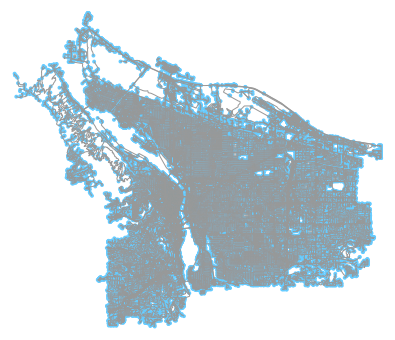

In [9]:
import osmnx as ox
ox.utils.config(all_oneway=True)
G = ox.graph_from_place('Portland, Oregon, USA', network_type='all')
fig, ax = ox.plot_graph(G)



In [10]:
ox.save_load.save_as_osm(G, filename="osmnx_portland.osm")

In [11]:
# Took around 30 minutes to save_as_osm, as warned about

# Time to build portland graph regularly using pbf from bbbike: 4.9 minutes
|V|=345005 |E|=906416

# Time to build protland graph using .OSM XML file: 2.3 minutes
|V|=145423 |E|=384313

# Roughly the same amount of time for each, given they define the portland area differently

### Scratchwork

In [34]:
%%bash
cd ..
ls
cd Desktop
ls

Applications
Applications (Parallels)
Creative Cloud Files
Desktop
Documents
Documents - Local
Downloads
Library
Movies
Music
Parallels
Pictures
Public
bogota
jython2.7.2
opt
otp
Bogota Papers
Coronavirus Screenshots
ECON 136 Outline.pdf
Econ 167 - Mira Environmental Economics
How to build an ecnomic model in your spare time.pdf
James M. Cain - Double Indemnity    - libgen.lc.pdf
Post-Undergrad
Ross  - Elementary Analysis  The Theory of Calculus (2013).pdf
Screen Shot 2020-05-20 at 10.45.15.png
Screen Shot 2020-05-20 at 10.50.06.png
Screen Shot 2020-05-20 at 10.59.28.png
Screen Shot 2020-05-21 at 17.15.26.png
Screen Shot 2020-05-23 at 13.29.14.png
Screen Shot 2020-05-23 at 15.20.42.png
Screen Shot 2020-05-23 at 15.48.12.png
Screen Shot 2020-05-23 at 18.57.15.png
Screen Shot 2020-05-23 at 19.46.20.png
Tversky Kahneman - Linda the Bank Teller (1983) .pdf
Untitled.txt
_Land Economics Research
external-content.duckduckgo-1.jpg
external-content.duckduckgo-2.jpg
external-content.duckduckgo.j

In [31]:
%%bash 
cd .. 
ls

Applications
Applications (Parallels)
Creative Cloud Files
Desktop
Documents
Documents - Local
Downloads
Library
Movies
Music
Parallels
Pictures
Public
bogota
jython2.7.2
opt
otp


In [21]:
! ls

Cairo R-OTP
Cairo Shapefiles
GIS-Coursework
OSM Bogota.ipynb
OTP_Portland_OriginDestinationMatrix_Manuel.txt
SF_otp
SFcentralsubwayaccessibility
bogota_otp
data
gcr_population_jobs-master
marcus_young_otp_tutorial
opentripplanner
otp-travel-time-matrix
urbanaccess


In [ ]:
G = ox.graph_from_place('Portland, Oregon, USA', network_type='all')
fig, ax = ox.plot_graph(G)


In [4]:
%%bash 
ls
java -Xmx10G -jar otp-1.4.0-shaded.jar --build /Users/BrianHill/otp/graphs/SF_muni


OSM Bogota.ipynb
SF_OTP_OriginDestinationMatrix.txt
Screen Shot 2020-05-05 at 00.06.00.png
Screenshots
all_nodes.csv
bogota_gondola_mirador_isochromes_v2.geojson
bogota_isochrome.Rmd
bogota_isochromes_v2.qgz
bogota_no_gondola_mirador_isochromes_v2.geojson
bogota_traveltime_matrix_no_gondola.xlsx
cache
graphs
lucene
old isochromes
old_files
otp-1.4.0-shaded.jar
point_mirador_station.csv
points_destinations.csv
points_origins.csv
points_test.csv
python_script.py
traveltime_matrix.csv
traveltime_matrix_gondola_manuel.csv
traveltime_matrix_manuel_points.xlsx
traveltime_matrix_no_gondola_manuel.csv
13:30:38.187 INFO (OTPServer.java:39) Wiring up and configuring server.
13:30:38.200 INFO (GraphBuilder.java:165) Wiring up and configuring graph builder task.
13:30:38.205 INFO (GraphBuilder.java:171) Searching for graph builder input files in /Users/BrianHill/otp/graphs/SF_muni
13:30:38.206 INFO (OTPMain.java:203) File '/Users/BrianHill/otp/graphs/SF_muni/build-config.json' is not present. Usin

May 25, 2020 1:30:59 PM org.hsqldb.persist.Logger logInfoEvent
INFO: dataFileCache open start
